In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
data_dir = "C:/Users/hp/Desktop/plant disesase/plant disesase/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(data_dir, "train")
valid_dir = os.path.join(data_dir, "valid")
test_dir = "C:/Users/hp/Desktop/plant disesase/plant disesase/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test/test"

In [ ]:
diseases = os.listdir(train_dir)

In [ ]:
print(diseases)
print("Total disease classes are: {}".format(len(diseases)))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy']
Total disease classes are: 25


In [ ]:
import os


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
print(f"Unique Plants are: \n{plants}")
print("Number of plants: {}".format(len(plants)))
print("Number of diseases: {}".format(NumberOfDiseases))

Unique Plants are: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean']
Number of plants: 11
Number of diseases: 15


In [ ]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(os.path.join(train_dir, disease)))

In [ ]:
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])


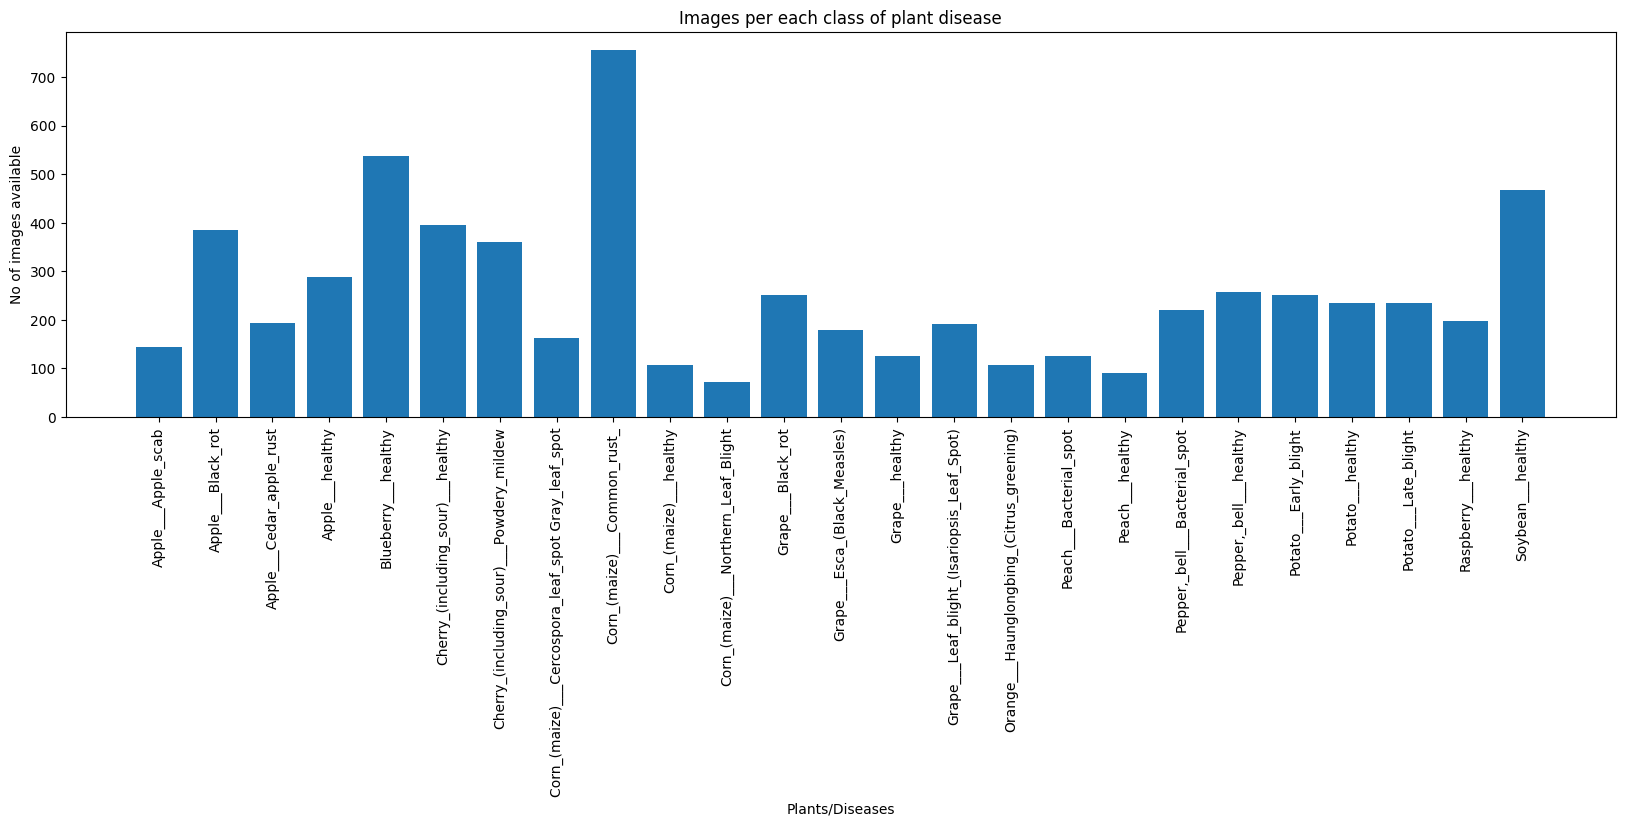

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(img_per_class.index, img_per_class['no. of images'])
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(rotation=90)
plt.title('Images per each class of plant disease')
plt.show()

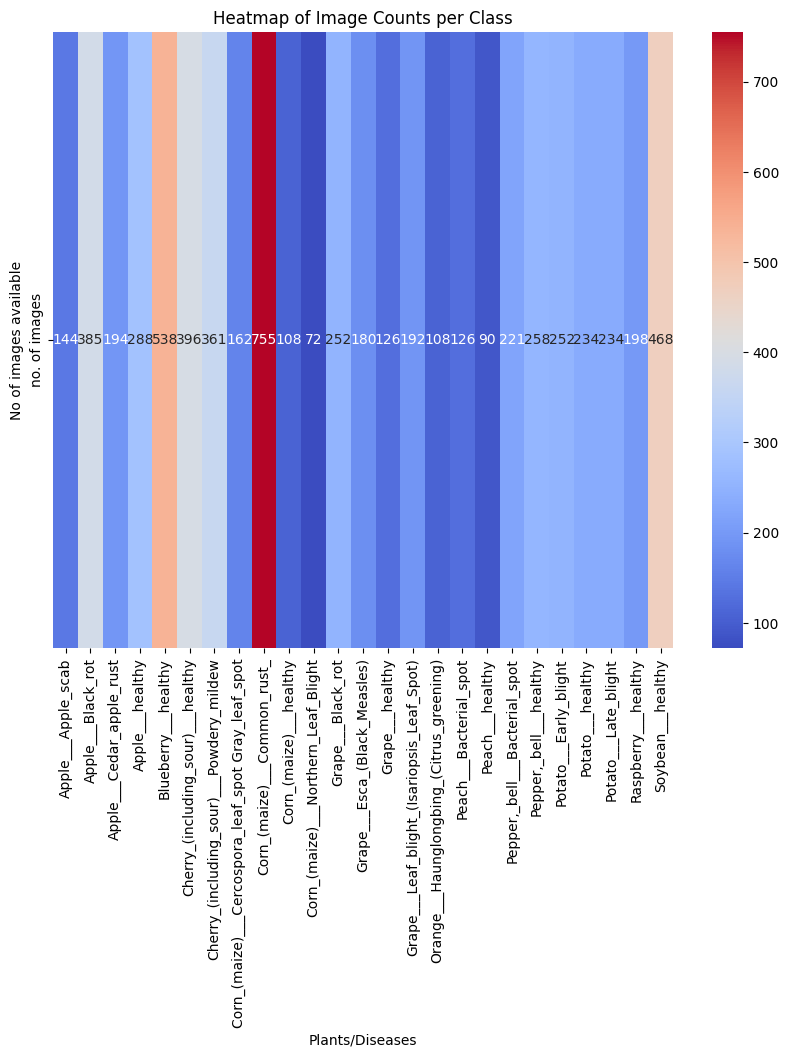

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(img_per_class.T, cmap='coolwarm', annot=True, fmt="d")
plt.title('Heatmap of Image Counts per Class')
plt.xlabel('Plants/Diseases')
plt.ylabel('No of images available')
plt.xticks(rotation=90)
plt.show()

In [ ]:
n_train = sum(nums.values())
print(f"There are {n_train} images for training")

There are 6342 images for training


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 6342 images belonging to 25 classes.
Found 4977 images belonging to 25 classes.


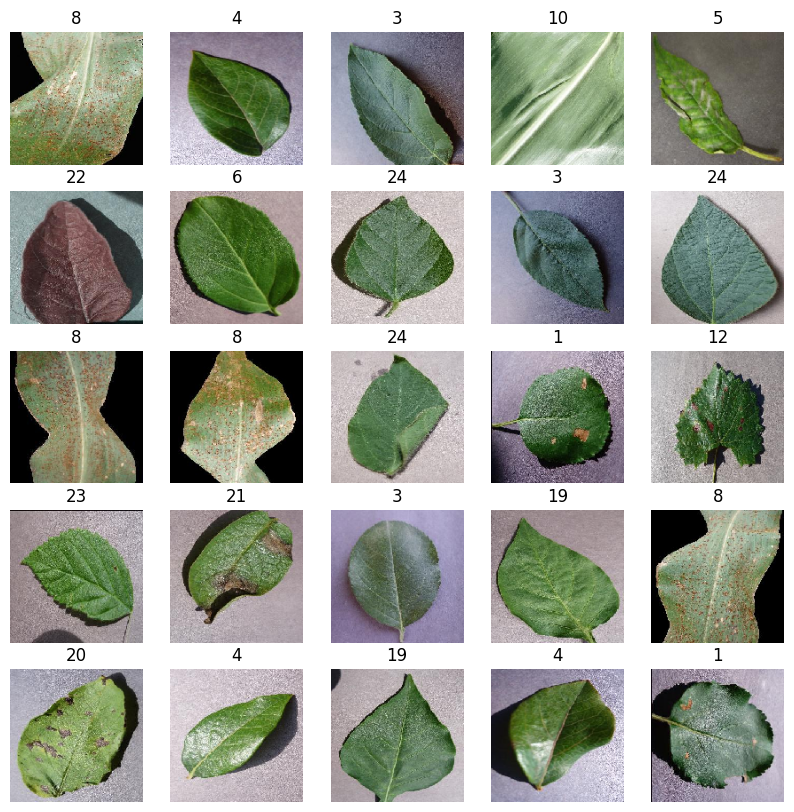

In [ ]:
def show_batch(data_gen):
    images, labels = next(data_gen)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

show_batch(train_generator)

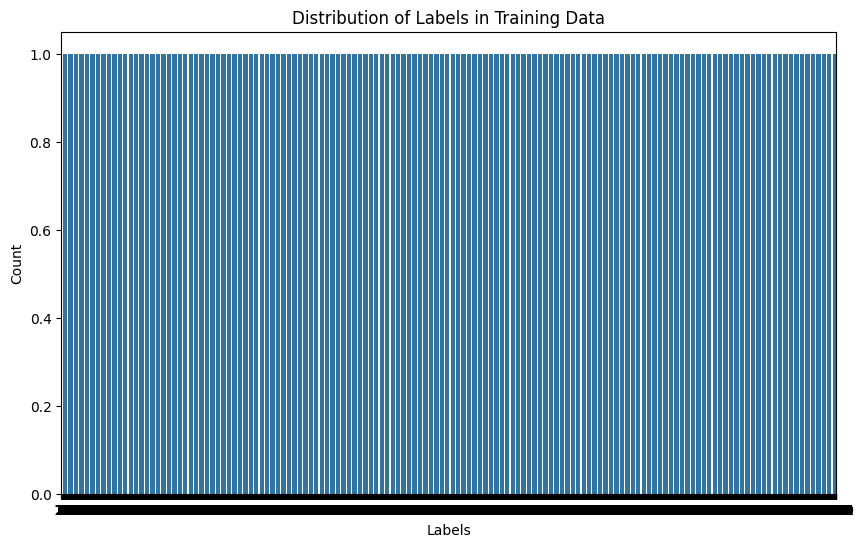

In [ ]:
plt.figure(figsize=(10, 6))
labels_count = train_generator.classes
sns.countplot(labels_count)
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

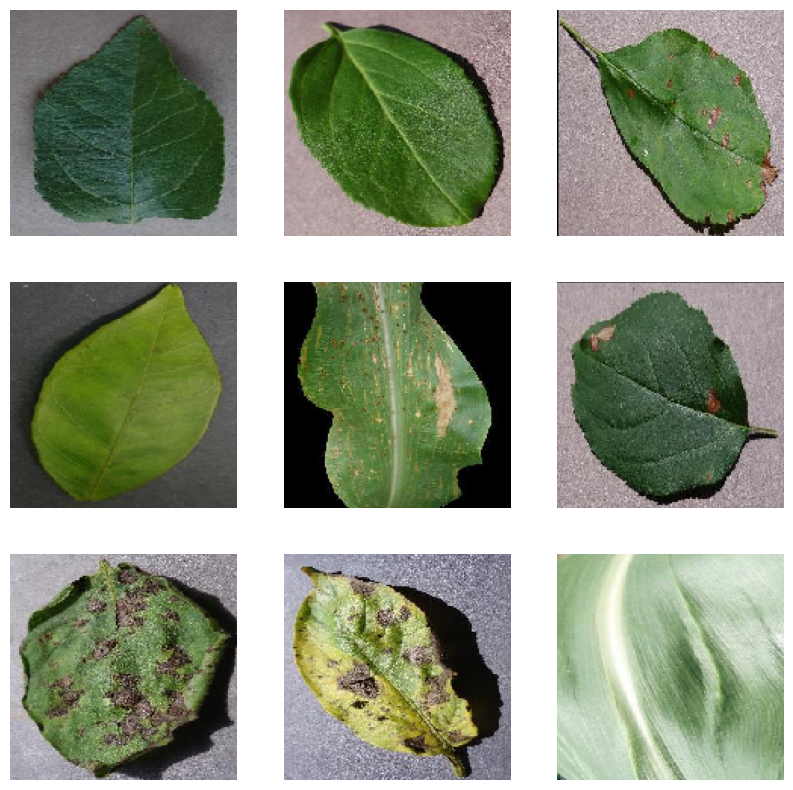

In [ ]:
sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

In [ ]:
resnet_model = Sequential([
    ResNet50(include_top=False, pooling='avg', weights='imagenet'),
    Dense(25, activation='softmax')
])

In [ ]:
resnet_model.layers[0].trainable = False

In [ ]:
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(
    train_generator,
    steps_per_epoch=n_train // 32,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.1848 - loss: 2.8364 - val_accuracy: 0.1437 - val_loss: 3.0037
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.3438 - loss: 2.6547 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.2263 - loss: 2.7563 - val_accuracy: 0.0991 - val_loss: 2.9398
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.2188 - loss: 2.5392 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.2599 - loss: 2.6747 - val_accuracy: 0.2140 - val_loss: 2.8346
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.2812 - loss: 2.7863 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.2885 - loss: 2.6100 - val_accuracy: 0.1674 - val_loss: 2.8064
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.25

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(diseases), activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=n_train // 32,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)


Epoch 1/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 99s 485ms/step - accuracy: 0.2097 - loss: 2.7255 - val_accuracy: 0.4107 - val_loss: 1.9695
Epoch 2/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.3750 - loss: 2.0849 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 95s 480ms/step - accuracy: 0.5306 - loss: 1.5544 - val_accuracy: 0.5533 - val_loss: 1.4198
Epoch 4/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.7188 - loss: 1.0197 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 98s 494ms/step - accuracy: 0.6998 - loss: 0.9583 - val_accuracy: 0.6974 - val_loss: 0.9576
Epoch 6/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8750 - loss: 0.4486 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 93s 469ms/step - accuracy: 0.7676 - loss: 0.7119 - val_accuracy: 0.7569 - val_loss: 0.7709
Epoch 8/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accura

In [ ]:
# Evaluate ResNet50 model on training data
train_loss, train_accuracy = resnet_model.evaluate(train_generator)
print(f"Training Accuracy (ResNet50): {train_accuracy}")

# Evaluate ResNet50 model on test data
test_loss, test_accuracy = resnet_model.evaluate(valid_generator)
print(f"Test Accuracy (ResNet50): {test_accuracy}")


199/199 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.3308 - loss: 2.4988
Training Accuracy (ResNet50): 0.33049511909484863
156/156 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.2147 - loss: 2.7297
Test Accuracy (ResNet50): 0.21920835971832275


In [ ]:
# Evaluate CNN model on training data
train_loss, train_accuracy = cnn_model.evaluate(train_generator)
print(f"Training Accuracy (CNN): {train_accuracy}")

# Evaluate CNN model on test data
test_loss, test_accuracy = cnn_model.evaluate(valid_generator)
print(f"Test Accuracy (CNN): {test_accuracy}")


199/199 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - accuracy: 0.9811 - loss: 0.0648
Training Accuracy (CNN): 0.9812362194061279
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.8077 - loss: 0.7602
Test Accuracy (CNN): 0.8117339611053467


In [ ]:
from keras.layers import Flatten
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the ResNet50 model
resnet = ResNet50(include_top=False, pooling='avg', weights='imagenet')
n_valid = sum([len(files) for r, d, files in os.walk(valid_dir)])

# Extract features using ResNet50
def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 2048))  # ResNet50 has 2048-dimensional features
    labels = np.zeros(sample_count)
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = resnet.predict(inputs_batch)  # Correctly use the resnet variable
        features[i * 32 : (i + 1) * 32] = features_batch
        labels[i * 32 : (i + 1) * 32] = np.argmax(labels_batch, axis=1)
        i += 1
        if i * 32 >= sample_count:
            break
    return features, labels

# Extract features for the training and validation data
train_features, train_labels = extract_features(train_dir, n_train)
valid_features, valid_labels = extract_features(valid_dir, n_valid)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Evaluate the Random Forest classifier
train_predictions = rf_classifier.predict(train_features)
valid_predictions = rf_classifier.predict(valid_features)

# Print classification report and accuracy
print("Training Set Metrics:")
print(classification_report(train_labels, train_predictions))
print("Training Set Accuracy:", accuracy_score(train_labels, train_predictions))

print("\nValidation Set Metrics:")
print(classification_report(valid_labels, valid_predictions))
print("Validation Set Accuracy:", accuracy_score(valid_labels, valid_predictions))


Found 6342 images belonging to 25 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━

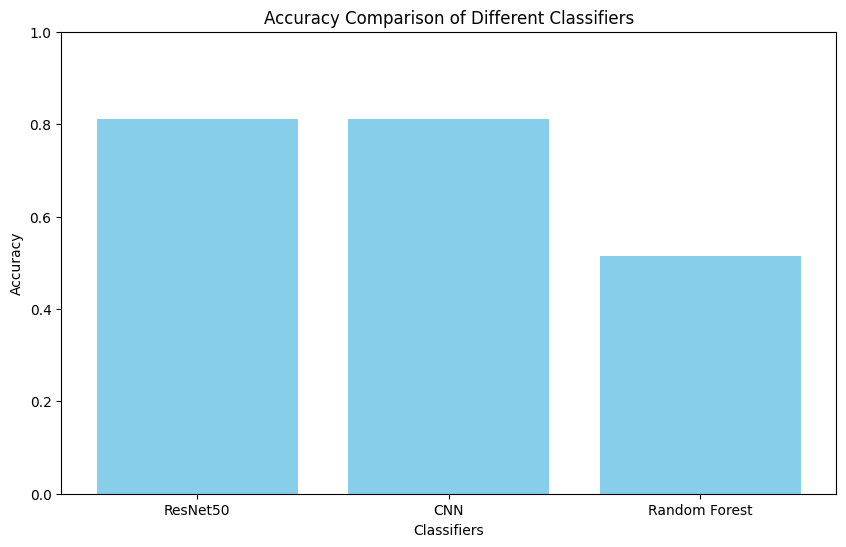

In [ ]:
import matplotlib.pyplot as plt

# Plot Bar Plot for Accuracy Comparison
classifiers = ['ResNet50', 'CNN', 'Random Forest']
accuracies = [test_accuracy, test_accuracy, accuracy_score(valid_labels, valid_predictions)]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
CNN predicted class: 2


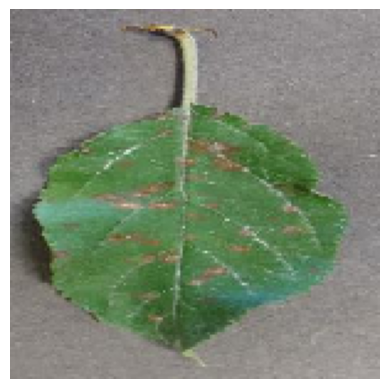

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
leaf_img_path = "C:/Users/hp/Desktop/plant disesase/plant disesase/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test/test/AppleCedarRust2.JPG"
leaf_img = image.load_img(leaf_img_path, target_size=(150, 150))  # Resize the image to match the input size of your models

# Convert the image to a numpy array and preprocess it
leaf_array = image.img_to_array(leaf_img)
leaf_array = np.expand_dims(leaf_array, axis=0)
leaf_array /= 255.  # Normalize pixel values

# Use ResNet50 model to make predictions
resnet_predictions = resnet_model.predict(leaf_array)
resnet_predicted_class = np.argmax(resnet_predictions)

# Use CNN model to make predictions
cnn_predictions = cnn_model.predict(leaf_array)
cnn_predicted_class = np.argmax(cnn_predictions)

# Use Random Forest classifier to make predictions
rf_features = resnet.predict(leaf_array)
rf_predicted_class = rf_classifier.predict(rf_features)

# Print predictions
#print("ResNet50 predicted class:", resnet_predicted_class)
print("CNN predicted class:", cnn_predicted_class)
#print("Random Forest predicted class:", rf_predicted_class)

# Display the image
plt.imshow(leaf_img)
plt.axis('off')
plt.show()